1.

En una cadena de desintegración radiactiva, el elemento A
 se desintegra en el elemento B
, que a su vez se desintegra en C
, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es 90Sr
, que se desintegra en 90Y
, que a su vez se desintegra a a 90Zr
. La vida media de 90Sr
 es de 28.78 años, y la vida media de 90Y
 es de 2.67 días. 90Zr
 es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:


 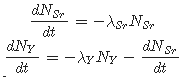

 Grafique la actividad relativa de una muestra de 90Sr
 y otra gráfica de 90Y
 en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

Nota: Recuerde que λ=ln2t1/2
 con t1/2
 el tiempo de vida media.

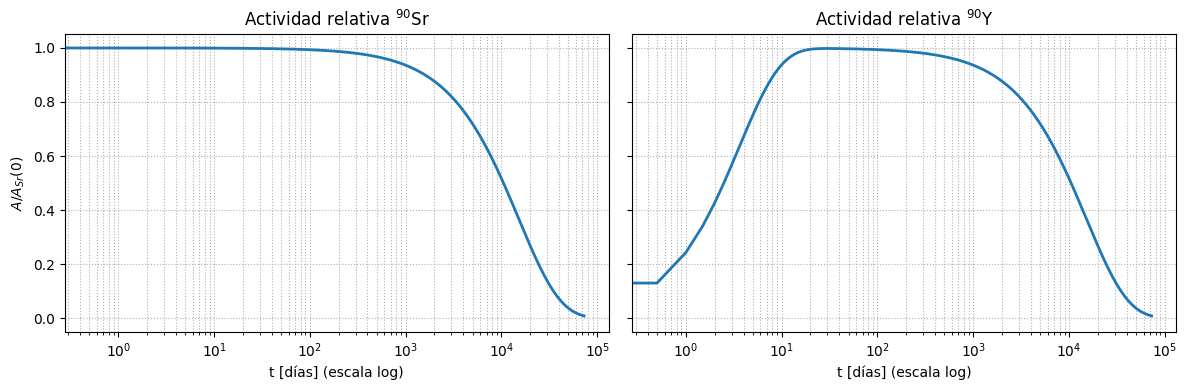

Tiempo del pico de actividad del 90Y: 30.0 días (0.08 años).
Actividad relativa máxima de 90Y: 0.998


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#  Datos (unidades coherentes: días)
ln2 = np.log(2.0)
t12_Sr_años = 28.78
t12_Y_dias    = 2.67

dias_por_año = 365.25
t12_Sr_dias   = t12_Sr_años * dias_por_año

lam_Sr = ln2 / t12_Sr_dias
lam_Y  = ln2 / t12_Y_dias

# Condiciones iniciales
N0_Sr = 1.0      # cantidad inicial (arbitraria, sirve para actividad relativa)
N0_Y  = 0.0

#  Mallado temporal (hasta 200 años)
T_fin_años = 200
T_fin_dias  = T_fin_años * dias_por_año

dt = 0.5  # paso en días (<< t1/2(Y)) para estabilidad de Euler
npasos = int(T_fin_dias / dt) + 1
t = np.linspace(0.0, T_fin_dias, npasos)

#  Integración por Euler explícito
N_Sr = np.empty_like(t)
N_Y  = np.empty_like(t)
N_Sr[0] = N0_Sr
N_Y[0]  = N0_Y

for k in range(npasos - 1):
    dNsr = -lam_Sr * N_Sr[k]
    dNy  = +lam_Sr * N_Sr[k] - lam_Y * N_Y[k]
    N_Sr[k+1] = N_Sr[k] + dt * dNsr
    N_Y[k+1]  = N_Y[k]  + dt * dNy

#  Actividades (A = lambda * N) y normalización relativa
A_Sr = lam_Sr * N_Sr
A_Y  = lam_Y  * N_Y
A0 = A_Sr[0] if A_Sr[0] != 0 else 1.0
A_Sr_rel = A_Sr / A0
A_Y_rel  = A_Y  / A0

#  Gráficas (escala de tiempo logarítmica ayuda a ver ambas escalas)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Sr-90
ax[0].semilogx(t, A_Sr_rel, lw=2)
ax[0].set_title(r'Actividad relativa $^{90}$Sr')
ax[0].set_xlabel('t [días] (escala log)')
ax[0].set_ylabel(r'$A/A_{Sr}(0)$')
ax[0].grid(True, which='both', ls=':')

# Y-90
ax[1].semilogx(t, A_Y_rel, lw=2)
ax[1].set_title(r'Actividad relativa $^{90}$Y')
ax[1].set_xlabel('t [días] (escala log)')
ax[1].grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()

#  (Opcional) Algunas cifras características
# Máximo de la actividad del Y-90
kmax = np.argmax(A_Y)
tmax_dias = t[kmax]
print(f"Tiempo del pico de actividad del 90Y: {tmax_dias:.1f} días "
      f"({tmax_dias/dias_por_año:.2f} años).")
print(f"Actividad relativa máxima de 90Y: {A_Y_rel[kmax]:.3f}")

2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

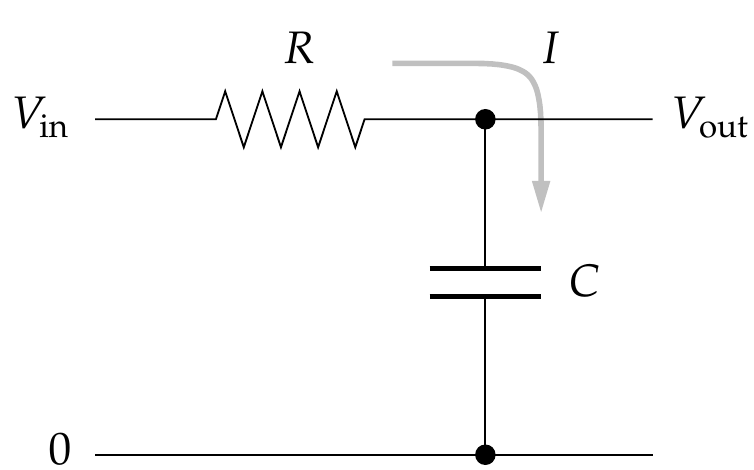

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea I
 la corriente que fluye a través de R
 y hacia el capacitor, y sea Q
 la carga en el capacitor. Entonces:

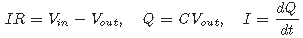

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que Vin−Vout=RC(dVoutdt)
 , o equivalentemente

 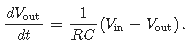

Escriba un programa para resolver esta ecuación para Vout(t)
 usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

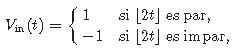

 donde ⌊x⌋ significa x redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde t=0
 hasta t=10
 cuando RC=0.01,0.1 y 1, con la condición inicial Vout(0)=0.

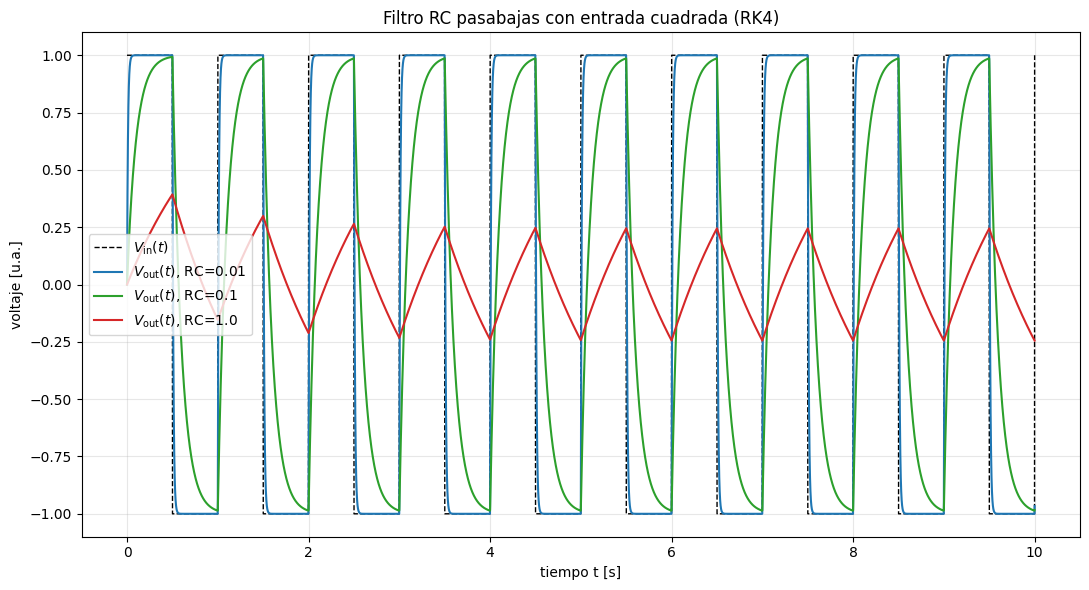

In [ ]:
#  señal de entrada: cuadrada ±1, período 1 (cambia cada 0.5 s)
def señal_entrada(t):
    """
    Vin(t) = 1 si floor(2t) es par,  -1 si es impar.
    Acepta escalar o arreglo numpy.
    """
    t = np.asarray(t)
    # paridad de floor(2t)
    paridad = (np.floor(2.0 * t).astype(int) % 2 == 0)
    return np.where(paridad, 1.0, -1.0)

#  ODE del filtro: dV/dt = (1/RC)*(Vin - V)
def rhs(t, v, RC):
    return (señal_entrada(t) - v) / RC

#  un paso de Runge-Kutta 4 (RK4) para ecuación escalar
def rk4_paso(t, v, h, RC):
    k1 = rhs(t,         v,               RC)
    k2 = rhs(t + h/2.0, v + h*k1/2.0,    RC)
    k3 = rhs(t + h/2.0, v + h*k2/2.0,    RC)
    k4 = rhs(t + h,     v + h*k3,        RC)
    return v + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

#  integración y gráficas
t0, tf = 0.0, 10.0
h = 1e-3                        # paso temporal (suficientemente pequeño)
tiempos = np.arange(t0, tf + h, h)

valores_RC = [0.01, 0.1, 1.0]
salidas = {}

for RC in valores_RC:
    v = 0.0                     # condición inicial Vout(0)=0
    trayectoria = np.empty_like(tiempos)
    for i, t in enumerate(tiempos):
        trayectoria[i] = v
        if i < len(tiempos) - 1:
            v = rk4_paso(t, v, h, RC)
    salidas[RC] = trayectoria

#  graficar Vin y Vout para cada RC
plt.figure(figsize=(11, 6))
plt.plot(tiempos, señal_entrada(tiempos), 'k--', lw=1, label=r'$V_{\rm in}(t)$')

colores = {0.01: '#1f77b4', 0.1: '#2ca02c', 1.0: '#d62728'}
for RC, vout in salidas.items():
    plt.plot(tiempos, vout, color=colores[RC], label=fr'$V_{{\rm out}}(t)$, RC={RC}')

plt.title('Filtro RC pasabajas con entrada cuadrada (RK4)')
plt.xlabel('tiempo t [s]')
plt.ylabel('voltaje [u.a.]')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población dP/dt
 con la población actual, P, dada una tasa de crecimiento, r, y una capacidad de carga, K. La ecuación logística se puede expresar como

 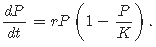

 Escriba una función my_logistic_eq(t, P, r, K) que represente la ecuación logística con un retorno de dP. Tenga en cuenta que este formato permite que my_logistic_eq se utilice como un argumento de entrada para solve_ivp. Suponga que los argumentos dP, t, P, r y K son todos escalares, y dP es el valor dPdt
 dado r, P y K. Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

 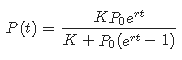

 donde P0 es la población inicial.

Grafique Pvs t
 utilizando el método de Euler y de RK4, comparando con la solución analítica.

Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

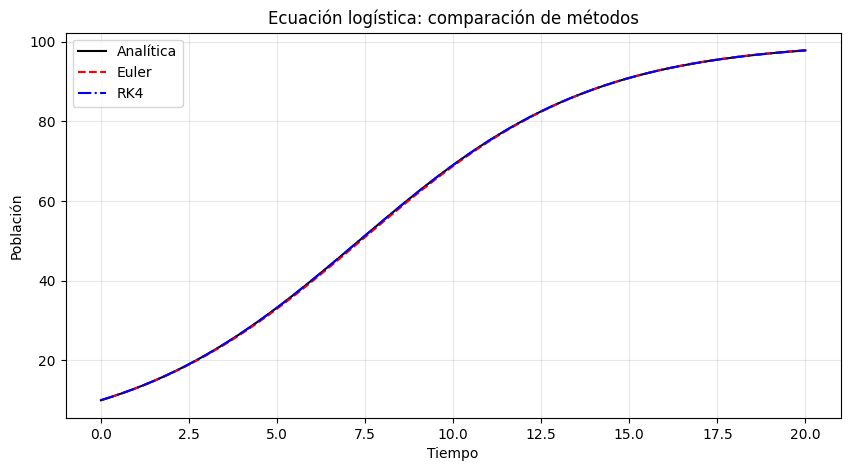

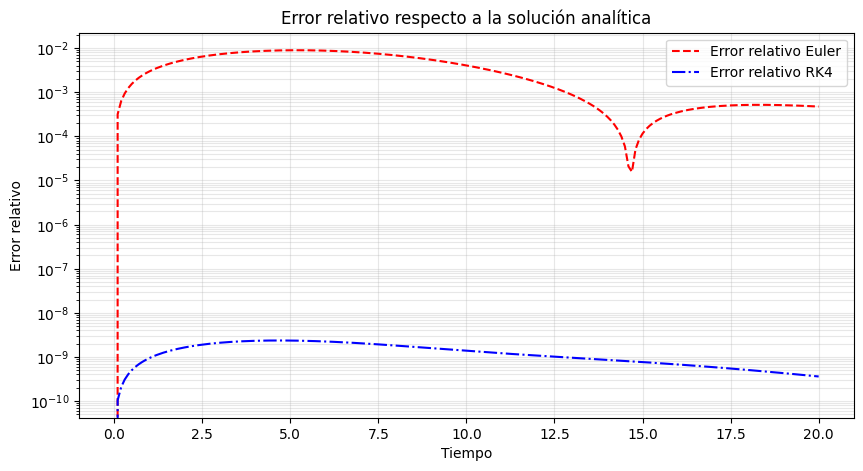

In [ ]:
#  Ecuación logística
def ecuacion_logistica(t, P, r, K):
    return r * P * (1 - P / K)

# Solución analítica
def solucion_analitica(t, P0, r, K):
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))

#  Método de Euler
def euler(t0, tf, h, P0, r, K):
    tiempos = np.arange(t0, tf + h, h)
    P = np.zeros_like(tiempos)
    P[0] = P0
    for i in range(len(tiempos) - 1):
        P[i+1] = P[i] + h * ecuacion_logistica(tiempos[i], P[i], r, K)
    return tiempos, P

#  Método RK4
def rk4(t0, tf, h, P0, r, K):
    tiempos = np.arange(t0, tf + h, h)
    P = np.zeros_like(tiempos)
    P[0] = P0
    for i in range(len(tiempos) - 1):
        k1 = ecuacion_logistica(tiempos[i], P[i], r, K)
        k2 = ecuacion_logistica(tiempos[i] + h/2, P[i] + h*k1/2, r, K)
        k3 = ecuacion_logistica(tiempos[i] + h/2, P[i] + h*k2/2, r, K)
        k4 = ecuacion_logistica(tiempos[i] + h, P[i] + h*k3, r, K)
        P[i+1] = P[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return tiempos, P

#  Parámetros del problema
P0 = 10    # población inicial
r = 0.3    # tasa de crecimiento
K = 100    # capacidad de carga
t0, tf, h = 0, 20, 0.1

# Soluciones
t_euler, P_euler = euler(t0, tf, h, P0, r, K)
t_rk4, P_rk4 = rk4(t0, tf, h, P0, r, K)
P_analitica = solucion_analitica(t_euler, P0, r, K)

#  Error relativo
error_rel_euler = np.abs(P_euler - P_analitica) / np.abs(P_analitica)
error_rel_rk4 = np.abs(P_rk4 - P_analitica) / np.abs(P_analitica)

# Gráficas
plt.figure(figsize=(10,5))
plt.plot(t_euler, P_analitica, 'k-', label='Analítica')
plt.plot(t_euler, P_euler, 'r--', label='Euler')
plt.plot(t_rk4, P_rk4, 'b-.', label='RK4')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Ecuación logística: comparación de métodos')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Gráfica de errores relativos
plt.figure(figsize=(10,5))
plt.plot(t_euler, error_rel_euler, 'r--', label='Error relativo Euler')
plt.plot(t_rk4, error_rel_rk4, 'b-.', label='Error relativo RK4')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.yscale('log')  # escala logarítmica para ver mejor la diferencia
plt.title('Error relativo respecto a la solución analítica')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.show()

4.

Considera la ecuación de movimiento para el desplazamiento angular u
 de un péndulo rígido no lineal de longitud l (donde g es la aceleración gravitacional):

 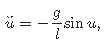

 con las condiciones iniciales:

 u(0)=u0,u˙(0)=0.

 El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial u0∈[−π,π]:

 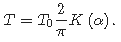

 con:

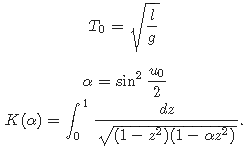

* Halle la solución u(t) utilizando el método de Runge Kutta con h=0.001 y distintos valores de u0=1 y u0=π/2.

* Grafique T/T0 en función de u0 y compare con el resultado analítico.


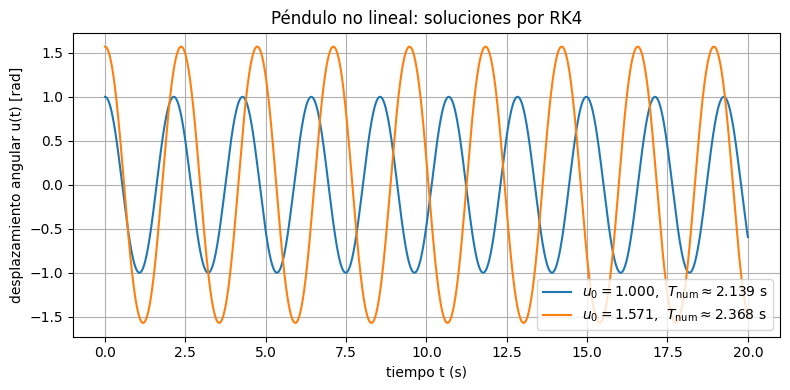

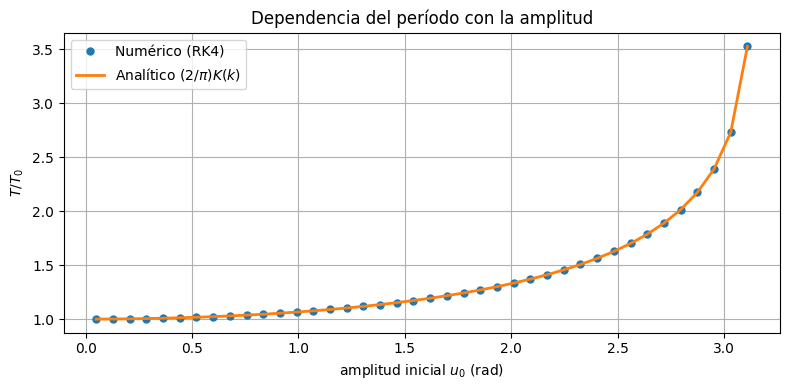

u0 = 1.000000 rad | T_num = 2.139245 s | T_ana = 2.139138 s | error relativo = 0.005%
u0 = 1.570796 rad | T_num = 2.367960 s | T_ana = 2.367842 s | error relativo = 0.005%


In [ ]:
from scipy.special import ellipk


# Parámetros físicos y numéricos

g = 9.81        # m/s^2
l = 1.0         # m
h = 1e-3        # paso de integración RK4
t_max = 20.0    # tiempo máximo (suficiente para cubrir al menos un período)

# Período de oscilación pequeña
T0 = 2*np.pi*np.sqrt(l/g)


# Ecuación en forma de sistema 1ª orden
# y = [u, v] con v = du/dt

def f_pendulo(t, y):
    u, v = y
    du = v
    dv = -(g/l)*np.sin(u)
    return np.array([du, dv])

def rk4_paso(funcion, t, y, h):
    k1 = funcion(t, y)
    k2 = funcion(t + 0.5*h, y + 0.5*h*k1)
    k3 = funcion(t + 0.5*h, y + 0.5*h*k2)
    k4 = funcion(t + h,     y + h*k3)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def integrar_pendulo(u0, v0=0.0, h=1e-3, t_max=20.0):
    n = int(np.ceil(t_max/h)) + 1
    t = np.linspace(0.0, n*h, n)
    y = np.zeros((n, 2))
    y[0] = [u0, v0]
    for i in range(n-1):
        y[i+1] = rk4_paso(f_pendulo, t[i], y[i], h)
    return t, y[:,0], y[:,1]  # t, u(t), v(t)

def periodo_numerico(u0, h=1e-3, t_max=20.0):
    # Integra y detecta el primer cruce de signo en v(t): - -> +
    t, u, v = integrar_pendulo(u0, 0.0, h, t_max)
    # al inicio v(0)=0 y dv/dt<0 => v se vuelve negativo; buscamos el primer cambio de - a +
    signo = np.sign(v)
    # ignorar los primeros puntos (arranque), empezamos cuando ya es negativo
    inicio = 5
    for i in range(inicio, len(v)-1):
        if (signo[i] < 0.0) and (signo[i+1] > 0.0):
            # Interpolación lineal del cruce
            t1, t2 = t[i], t[i+1]
            v1, v2 = v[i], v[i+1]
            tc = t1 + (0 - v1)*(t2 - t1)/(v2 - v1)   # tiempo del cruce v=0
            T = 2.0*tc  # cruce corresponde a T/2
            return T, t, u, v
    # Si no encontró cruce, devolvemos NaN
    return np.nan, t, u, v


# (1) Solución u(t) para u0=1 y u0=π/2

u0_listado = [1.0, np.pi/2]
plt.figure(figsize=(8,4))
for u0 in u0_listado:
    T_num, t, u, v = periodo_numerico(u0, h=h, t_max=t_max)
    plt.plot(t, u, label=fr"$u_0={u0:.3f}$,  $T_\mathrm{{num}}\approx{T_num:.3f}$ s")
plt.xlabel("tiempo t (s)")
plt.ylabel("desplazamiento angular u(t) [rad]")
plt.title("Péndulo no lineal: soluciones por RK4")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# (2) Curva T/T0 vs u0 (numérica vs analítica)

u0_vals = np.linspace(0.05, 0.99*np.pi, 40)  # evitar llegar exactamente a π
T_num_vals = []
T_ana_vals = []
for u0 in u0_vals:
    # Período analítico
    k = np.sin(0.5*u0)
    Kcomp = ellipk(k**2)               # K(m) con m=k^2
    T_ana = 4*np.sqrt(l/g)*Kcomp       # forma estándar
    # o de forma adimensional: T_ana/T0 = (2/pi)*K(m)
    T_ana_vals.append(T_ana)

    # Período numérico
    Tn, *_ = periodo_numerico(u0, h=h, t_max=t_max)
    T_num_vals.append(Tn)

T_num_vals = np.array(T_num_vals)
T_ana_vals = np.array(T_ana_vals)

plt.figure(figsize=(8,4))
plt.plot(u0_vals, T_num_vals/T0, "o", ms=5, label="Numérico (RK4)")
plt.plot(u0_vals, (2/np.pi)*ellipk(np.sin(0.5*u0_vals)**2), "-", lw=2, label="Analítico $(2/\\pi)K(k)$")
plt.xlabel(r"amplitud inicial $u_0$ (rad)")
plt.ylabel(r"$T/T_0$")
plt.title("Dependencia del período con la amplitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# (3) Reporte puntual para u0=1 y u0=π/2

for u0 in [1.0, np.pi/2]:
    Tn, _, _, _ = periodo_numerico(u0, h=h, t_max=t_max)
    k = np.sin(0.5*u0)
    Ta = 4*np.sqrt(l/g)*ellipk(k**2)
    err_rel = abs(Tn - Ta)/Ta
    print(f"u0 = {u0:.6f} rad | T_num = {Tn:.6f} s | T_ana = {Ta:.6f} s | error relativo = {1e2*err_rel:.3f}%")

5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos (x) y zorros (y). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$
dx/dt=αx−βxy
$$
$$
dy/dt=−γy+δxy
$$

Donde:

x(t)representa la población de conejos en el tiempo t
y(t)representa la población de zorros en el tiempo t
α= 0.8 (tasa de reproducción de los conejos)
β = 0.04 (tasa de depredación de conejos por zorros)
γ= 0.3 (tasa de mortalidad natural de los zorros)
δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)
Condiciones iniciales:

x(0)= 50 (población inicial de conejos)
y(0)= 20 (población inicial de zorros)
a) Implemente el método de Euler para resolver este sistema con un paso temporal de h= 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b) Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c) Compare los resultados de Euler y RK4 mediante:
Gráficas de la evolución temporal de ambas poblaciones
Diagrama de fase (x vs y)
Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia.

d) Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal (h= 0.5, h= 0.05). ¿Qué observa? Explique por qué ocurre.

e) Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.


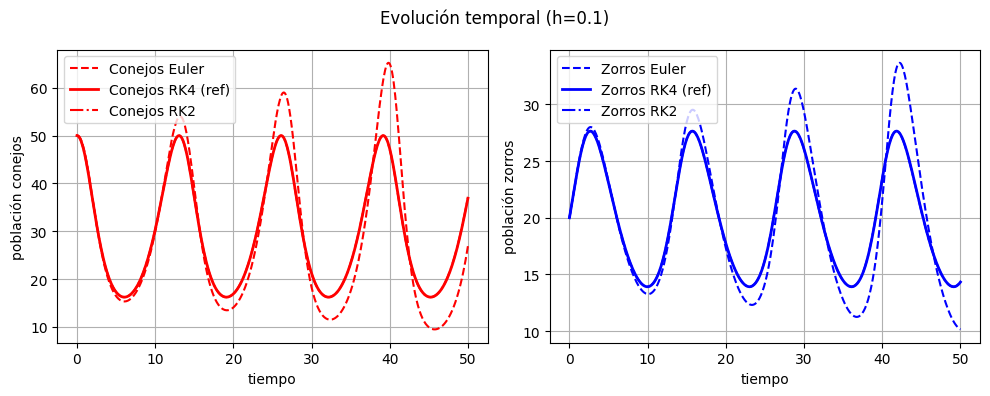

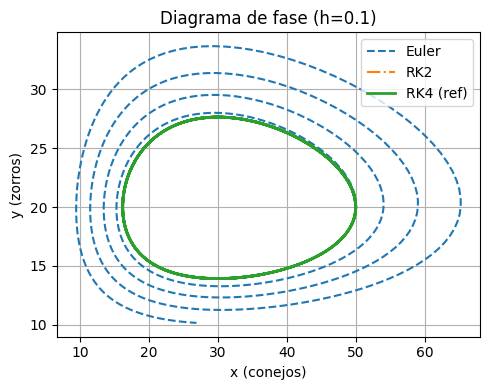

Error relativo (L2) vs RK4 (h=0.1):  Euler = 1.601e-01   |   RK2 = 1.808e-03


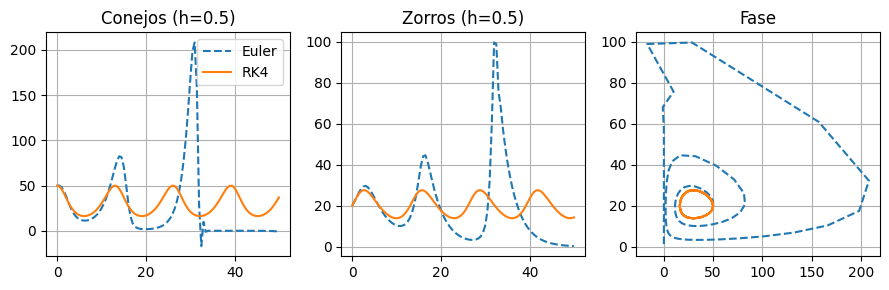

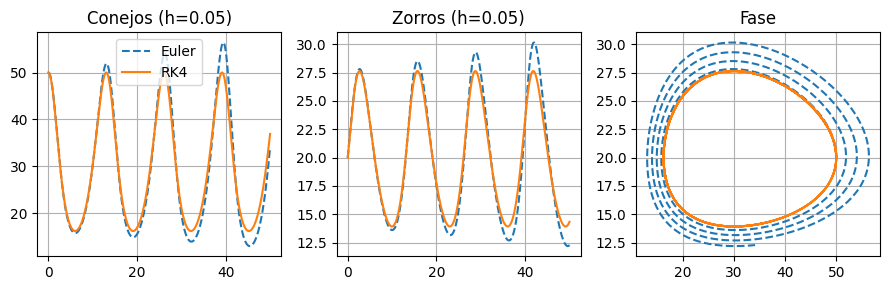

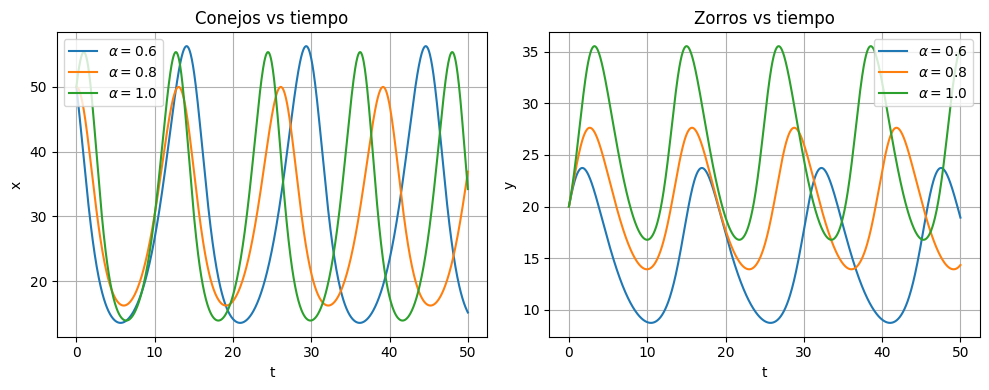

In [5]:
# Parámetros base del modelo

alpha = 0.8   # tasa de reproducción de conejos
beta  = 0.04  # tasa de depredación
gamma = 0.3   # mortalidad natural de zorros
delta = 0.01  # eficiencia de conversión
params = (alpha, beta, gamma, delta)

# Condiciones iniciales
x0, y0 = 50.0, 20.0

# Sistema Runge-Kutta
def Runge_Kutta(t, X, pars):
    x, y = X
    a, b, c, d = pars
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return np.array([dx, dy])


# Integradores genéricos en la misma malla

def euler(f, t0, tf, h, X0, pars):
    n = int(np.ceil((tf-t0)/h)) + 1
    t = np.linspace(t0, t0 + h*(n-1), n)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for k in range(n-1):
        X[k+1] = X[k] + h * f(t[k], X[k], pars)
    return t, X

def rk2_puntomedio(f, t0, tf, h, X0, pars):
    n = int(np.ceil((tf-t0)/h)) + 1
    t = np.linspace(t0, t0 + h*(n-1), n)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for k in range(n-1):
        k1 = f(t[k], X[k], pars)
        k2 = f(t[k] + 0.5*h, X[k] + 0.5*h*k1, pars)
        X[k+1] = X[k] + h*k2
    return t, X

def rk4(f, t0, tf, h, X0, pars):
    n = int(np.ceil((tf-t0)/h)) + 1
    t = np.linspace(t0, t0 + h*(n-1), n)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for k in range(n-1):
        k1 = f(t[k], X[k], pars)
        k2 = f(t[k] + 0.5*h, X[k] + 0.5*h*k1, pars)
        k3 = f(t[k] + 0.5*h, X[k] + 0.5*h*k2, pars)
        k4 = f(t[k] + h,     X[k] + h*k3, pars)
        X[k+1] = X[k] + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t, X


# (a) Euler, (b) RK2 y RK4 con h=0.1

t0, tf, h = 0.0, 50.0, 0.1
t_E, XE = euler(Runge_Kutta, t0, tf, h, np.array([x0, y0]), params)
t_R2, XR2 = rk2_puntomedio(Runge_Kutta, t0, tf, h, np.array([x0, y0]), params)
t_R4, XR4 = rk4(Runge_Kutta, t0, tf, h, np.array([x0, y0]), params)


# (c) Comparaciones

# Series temporales
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t_E, XE[:,0], 'r--',  label='Conejos Euler')
plt.plot(t_R4, XR4[:,0], 'r',  lw=2, label='Conejos RK4 (ref)')
plt.plot(t_R2, XR2[:,0], 'r-.',label='Conejos RK2')
plt.xlabel('tiempo'); plt.ylabel('población conejos')
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t_E, XE[:,1], 'b--',  label='Zorros Euler')
plt.plot(t_R4, XR4[:,1], 'b',  lw=2, label='Zorros RK4 (ref)')
plt.plot(t_R2, XR2[:,1], 'b-.',label='Zorros RK2')
plt.xlabel('tiempo'); plt.ylabel('población zorros')
plt.legend(); plt.grid(True)
plt.suptitle('Evolución temporal (h=0.1)')
plt.tight_layout(); plt.show()

# Diagrama de fase
plt.figure(figsize=(5,4))
plt.plot(XE[:,0],  XE[:,1],  '--',  label='Euler')
plt.plot(XR2[:,0], XR2[:,1], '-.',  label='RK2')
plt.plot(XR4[:,0], XR4[:,1], '-',   lw=2, label='RK4 (ref)')
plt.xlabel('x (conejos)'); plt.ylabel('y (zorros)')
plt.legend(); plt.grid(True); plt.title('Diagrama de fase (h=0.1)')
plt.tight_layout(); plt.show()

# Error relativo (norma L2 en el tiempo) tomando RK4 como referencia en la MISMA malla
def error_relativo_series(X_aprox, X_ref):
    # error relativo por componente (x, y)
    num = np.sqrt(np.trapezoid(np.sum((X_aprox - X_ref)**2, axis=1), dx=h))
    den = np.sqrt(np.trapezoid(np.sum(X_ref**2,            axis=1), dx=h))
    return num/den

err_euler = error_relativo_series(XE,  XR4)
err_rk2   = error_relativo_series(XR2, XR4)
print(f"Error relativo (L2) vs RK4 (h=0.1):  Euler = {err_euler:.3e}   |   RK2 = {err_rk2:.3e}")


# (d) Estabilidad con h = 0.5 y h = 0.05

for h_test in [0.5, 0.05]:
    tE, XE2 = euler(Runge_Kutta, t0, tf, h_test, np.array([x0, y0]), params)
    tR4, XR4_2 = rk4(Runge_Kutta, t0, tf, h_test, np.array([x0, y0]), params)
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.plot(tE, XE2[:,0], '--', label='Euler'); plt.plot(tR4, XR4_2[:,0], '-', label='RK4')
    plt.title(f'Conejos (h={h_test})'); plt.grid(True); plt.legend()
    plt.subplot(1,3,2)
    plt.plot(tE, XE2[:,1], '--'); plt.plot(tR4, XR4_2[:,1], '-')
    plt.title(f'Zorros (h={h_test})'); plt.grid(True)
    plt.subplot(1,3,3)
    plt.plot(XE2[:,0], XE2[:,1], '--'); plt.plot(XR4_2[:,0], XR4_2[:,1], '-')
    plt.title('Fase'); plt.grid(True)
    plt.tight_layout(); plt.show()


# (e) Sensibilidad: variamos α

valores_alpha = [0.6, 0.8, 1.0]
plt.figure(figsize=(10,4))
for a in valores_alpha:
    pars = (a, beta, gamma, delta)
    t_ref, X_ref = rk4(Runge_Kutta, t0, tf, 0.05, np.array([x0, y0]), pars)  # mismo h para comparar formas
    plt.subplot(1,2,1)
    plt.plot(t_ref, X_ref[:,0], label=fr'$\alpha={a}$')
    plt.subplot(1,2,2)
    plt.plot(t_ref, X_ref[:,1], label=fr'$\alpha={a}$')

plt.subplot(1,2,1); plt.title('Conejos vs tiempo'); plt.xlabel('t'); plt.ylabel('x'); plt.grid(True); plt.legend()
plt.subplot(1,2,2); plt.title('Zorros vs tiempo');  plt.xlabel('t'); plt.ylabel('y'); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()

6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

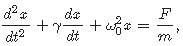

donde γ es la constante de amortiguamiento, $$ω_0=√k/m$$ es la frecuencia angular natural, m es la masa y F es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

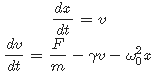

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

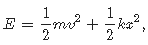

Considere x(0)=0 y v(0)=1. Grafique x(t) y E(t)
 para los siguientes casos:

* F=0 y para γ=[0,0.05,0.3].
* γ=0, F=F0cos(ωt) e^(−t^2/T^2) con F0=1N, T=10s y ω=[0,0.8ω_0,ω_0]


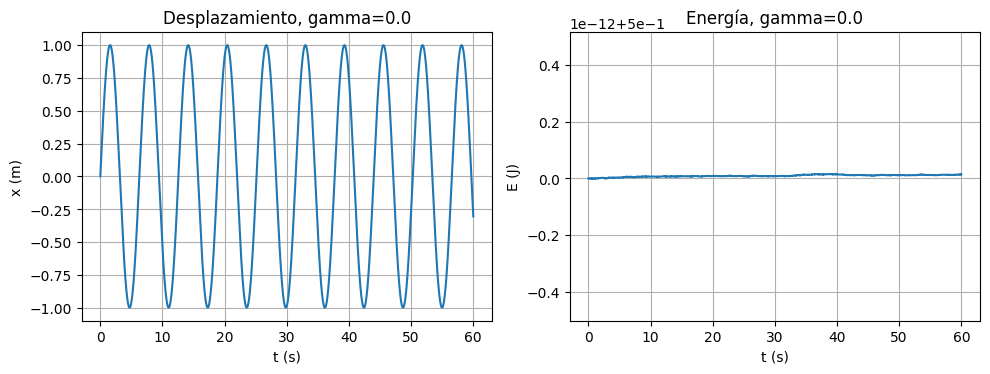

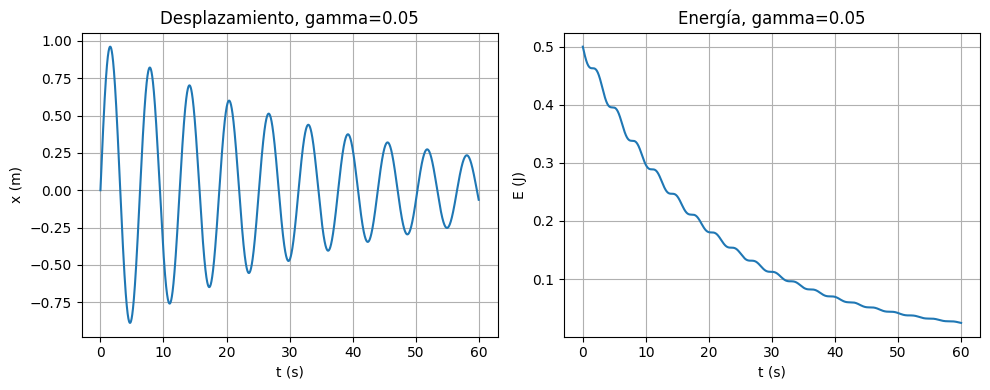

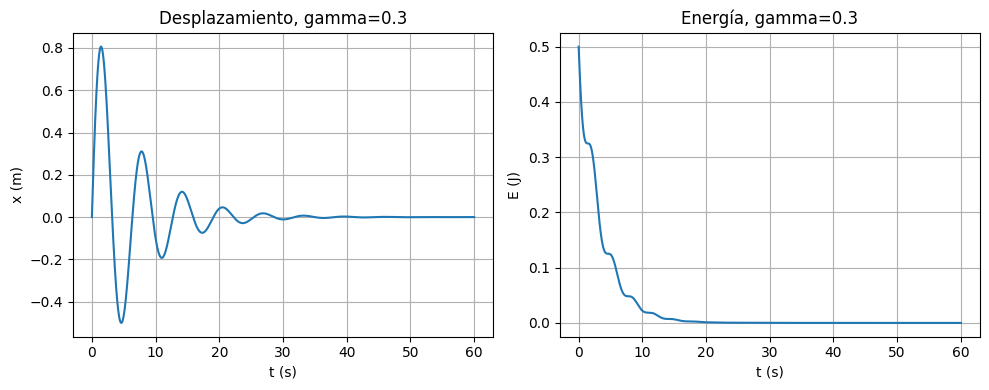

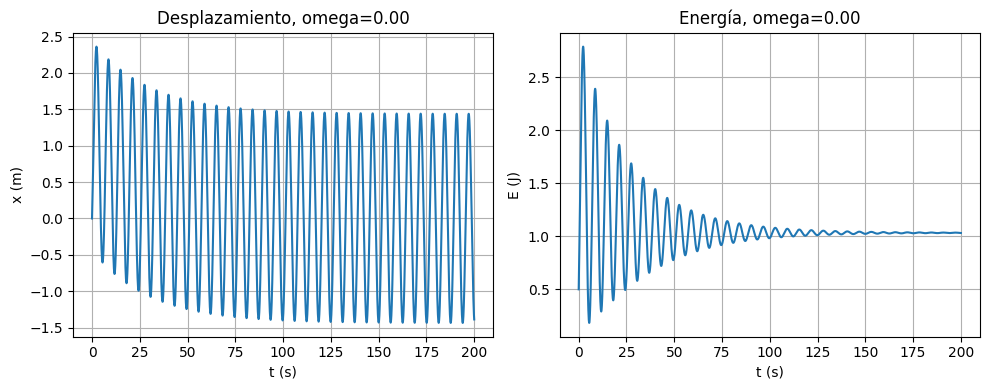

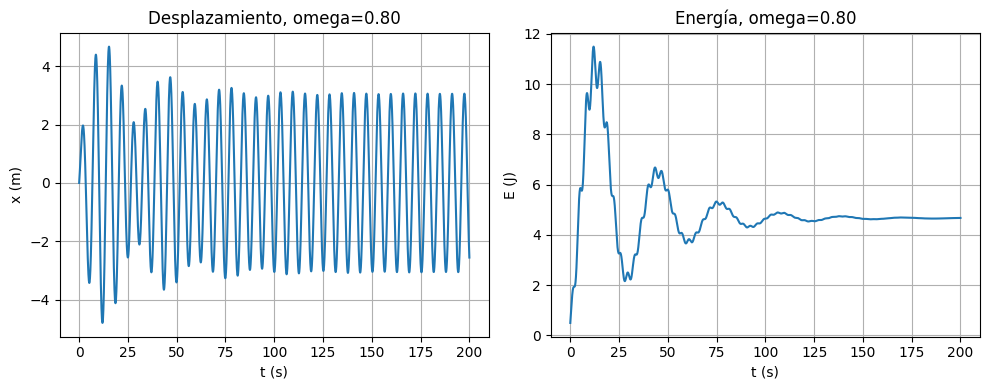

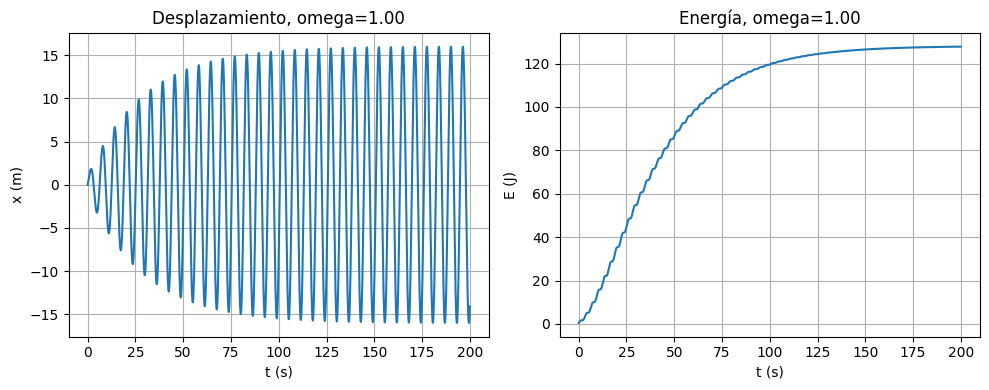

In [6]:


# Parámetros físicos

m = 1.0       # masa (kg)
k = 1.0       # constante del resorte (N/m)
omega0 = np.sqrt(k/m)

# Condiciones iniciales
x0 = 0.0
v0 = 1.0

# RK4 para sistema de 1º orden
def rk4_sistema(func, t0, tf, h, y0):
    n = int(np.ceil((tf - t0)/h)) + 1
    t = np.linspace(t0, t0 + (n-1)*h, n)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        ti = t[i]
        yi = y[i]
        k1 = func(ti, yi)
        k2 = func(ti + 0.5*h, yi + 0.5*h*k1)
        k3 = func(ti + 0.5*h, yi + 0.5*h*k2)
        k4 = func(ti + h, yi + h*k3)
        y[i+1] = yi + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

# Energía
def energia(y):
    x = y[:,0]
    v = y[:,1]
    return 0.5*m*v**2 + 0.5*k*x**2


# Caso A: F = 0, varios gamma

def caso_sin_fuerza(gammas=[0.0, 0.05, 0.3], h=0.001, tf=60.0):
    for gamma in gammas:
        def f(t, y):
            x, v = y
            dx = v
            dv = -gamma*v - (k/m)*x   # F=0
            return np.array([dx, dv])
        t, y = rk4_sistema(f, 0.0, tf, h, np.array([x0, v0]))
        E = energia(y)

        # Graficar
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.plot(t, y[:,0])
        plt.xlabel('t (s)'); plt.ylabel('x (m)')
        plt.title(f'Desplazamiento, gamma={gamma}')
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(t, E)
        plt.xlabel('t (s)'); plt.ylabel('E (J)')
        plt.title(f'Energía, gamma={gamma}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# Caso B: gamma=0, F(t)=F0*cos(omega*t)*exp(-t/tau)

def caso_fuerza_transitoria(omegas=[0.0, 0.8*omega0, 1.0*omega0], F0=1.0, tau=30.0, h=0.001, tf=200.0):
    for omega in omegas:
        def F(t):
            return F0 * np.cos(omega*t) * np.exp(-t/tau)
        def f(t, y):
            x, v = y
            dx = v
            dv = (F(t)/m) - (k/m)*x   # gamma = 0
            return np.array([dx, dv])
        t, y = rk4_sistema(f, 0.0, tf, h, np.array([x0, v0]))
        E = energia(y)

        # Graficar
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.plot(t, y[:,0])
        plt.xlabel('t (s)'); plt.ylabel('x (m)')
        plt.title(f'Desplazamiento, omega={omega:.2f}')
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(t, E)
        plt.xlabel('t (s)'); plt.ylabel('E (J)')
        plt.title(f'Energía, omega={omega:.2f}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Ejecutar

caso_sin_fuerza()
caso_fuerza_transitoria()

7.

El problema restringido de tres cuerpos describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos m1 y m2, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa μ como:

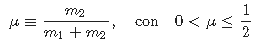

Si tomamos un sistema de referencia rotante con velocidad angular ω , cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el potencial efectivo U puede escribirse como:

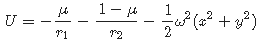

donde r1 y r2 son las distancias del cuerpo de prueba a m1 y m2 respectivamente:

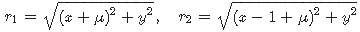

Las ecuaciones de movimiento de la partícula testigo son:

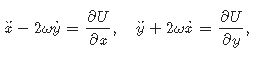

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y ω2=1, existen cinco puntos de Lagrange (L1,L2,L3,L4,L5)donde las fuerzas se equilibran.

Los puntos triangulares L4 y L5 forman un triángulo equilátero con los cuerpos principales. Si colocamos m1 en (−μ,0) y m2 en (1−μ,0) en el sistema rotante, las coordenadas de L4 y L5 son:

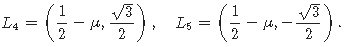

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:
$$ r_1=r_2 $$

Para estudiar la estabilidad de L4 y L5, introducimos pequeñas perturbaciones. Por ejemplo, alrededor de L4:

image.png

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en serie de Taylor hasta primer orden en ξ y η, obtenemos el sistema de ecuaciones linealizado:

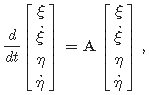

donde la matriz A tiene la forma:

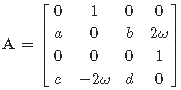

Los coeficientes de la matriz A están dados por las segundas derivadas parciales del potencial efectivo U evaluadas en L4:

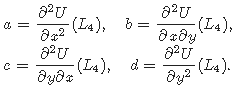

Esto mismo se hace para L5. Luego, la estabilidad de L4 y L5 se determina analizando los valores propios de la matriz A. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.

* Encuentre los valores propios de la matriz A y analice su estabilidad.
* Determine el valor crítico de μ_c que garantiza la estabilidad de Li con i=4,5 para esto varie μ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado criterio de Routh.
$$μ<μ_c≈0.03852.$$
* Finalmente, examine la estabilidad de L4 y L5 para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [2]:
import sympy as sp

# Parámetro de masa reducido
mu = sp.Symbol("mu", real=True)

# Coordenadas en L4
x, y = sp.symbols("x y", real=True)
x_L4 = 1/2 - mu
y_L4 = sp.sqrt(3)/2

# Distancias a los cuerpos
r1 = sp.sqrt((x + mu)**2 + y**2)
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)

# Potencial efectivo
U = -mu/r1 - (1 - mu)/r2 - 0.5*(x**2 + y**2)

# Derivadas segundas
a = sp.diff(U, x, x).subs({x: x_L4, y: y_L4})
b = sp.diff(U, x, y).subs({x: x_L4, y: y_L4})
c = sp.diff(U, y, x).subs({x: x_L4, y: y_L4})
d = sp.diff(U, y, y).subs({x: x_L4, y: y_L4})

# Matriz A
A = sp.Matrix([
    [0, 1, 0, 0],
    [a, 0, b, 2],
    [0, 0, 0, 1],
    [c, -2, d, 0]
])

print("Matriz A en L4:")
sp.pprint(A)

# Autovalores
valores_propios = A.eigenvals()
print("\nValores propios de la matriz A:")
print(valores_propios)

# Sustitución de un valor de mu (ejemplo: Sol-Tierra)
mu_num = 3e-6
A_num = A.subs(mu, mu_num).evalf()
valores_num = A_num.eigenvals()

print("\nAutovalores para mu =", mu_num, ":")
print(valores_num)

Matriz A en L4:
⎡        0           1           0           0⎤
⎢                                             ⎥
⎢                        3⋅√3⋅(0.5 - 1.0⋅μ)   ⎥
⎢      -0.75         0   ──────────────────  2⎥
⎢                                2            ⎥
⎢                                             ⎥
⎢        0           0           0           1⎥
⎢                                             ⎥
⎢3⋅√3⋅(0.5 - 1.0⋅μ)                           ⎥
⎢──────────────────  -2        -2.25         0⎥
⎣        2                                    ⎦

Valores propios de la matriz A:
{-1.87082869338697*sqrt(-sqrt(0.551020408163265*mu**2 - 0.551020408163265*mu + 1.0) - 1): 1, 1.87082869338697*sqrt(-sqrt(0.551020408163265*mu**2 - 0.551020408163265*mu + 1.0) - 1): 1, -1.87082869338697*sqrt(sqrt(0.551020408163265*mu**2 - 0.551020408163265*mu + 1.0) - 1): 1, 1.87082869338697*sqrt(sqrt(0.551020408163265*mu**2 - 0.551020408163265*mu + 1.0) - 1): 1}

Autovalores para mu = 3e-06 :
{-5.98457300081725e-65 - 2.

8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la ecuación de Jeans en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial Σ(r,t) y la velocidad en presencia de la auto-gravitación del disco.

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:

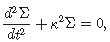

donde κ es la frecuencia de epicíclo, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular. Muchas galaxias espirales presentan una curva de rotación aproximadamente plana a grandes radios, es decir, la velocidad de rotación V(r) es aproximadamente constante:
$$V(r)≈V_0. $$
En este caso, la frecuencia de epicíclo se puede aproximar como:
$$κ≈2√Ω,$$
donde:

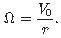

* Graficar la evolución temporal de Σ(t).
* Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.
* Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.

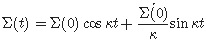

* Analizar cómo cambia la estabilidad del sistema al modificar κ.

r = 4.0: kappa = 77.7817, a = kappa^2 = 6050.0000, autovalores(A) = [0.+77.78174593j 0.-77.78174593j]
r = 8.0: kappa = 38.8909, a = kappa^2 = 1512.5000, autovalores(A) = [0.+38.89087297j 0.-38.89087297j]
r = 12.0: kappa = 25.9272, a = kappa^2 = 672.2222, autovalores(A) = [0.+25.92724864j 0.-25.92724864j]
[estable (a>0)] a = 1512.5000, autovalores(A) = [0.+38.89087297j 0.-38.89087297j]
[inestable (a<0)] a = -378.1250, autovalores(A) = [ 19.44543648 -19.44543648]


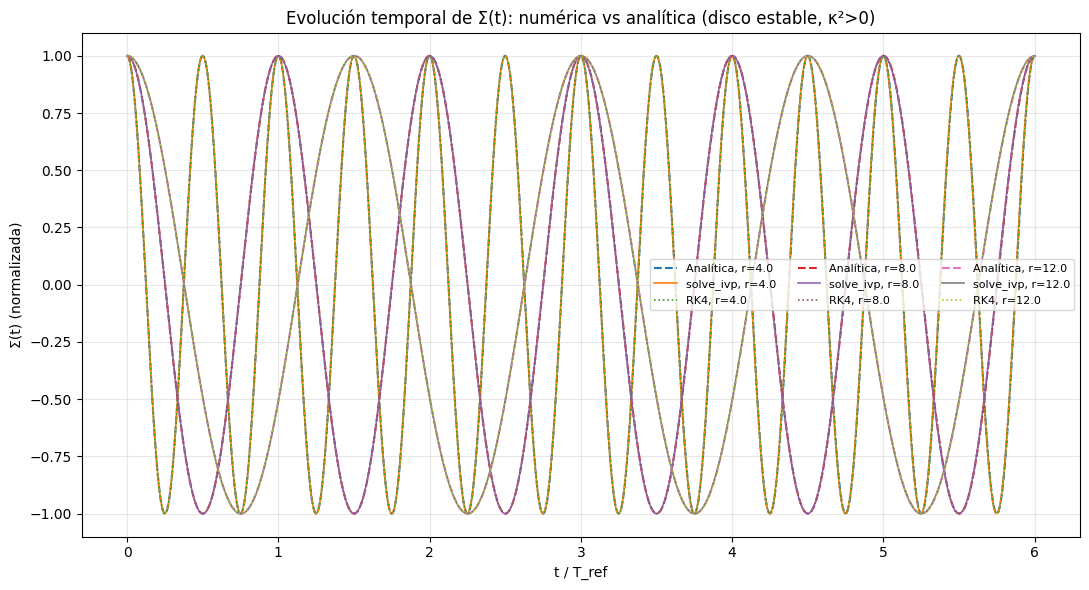

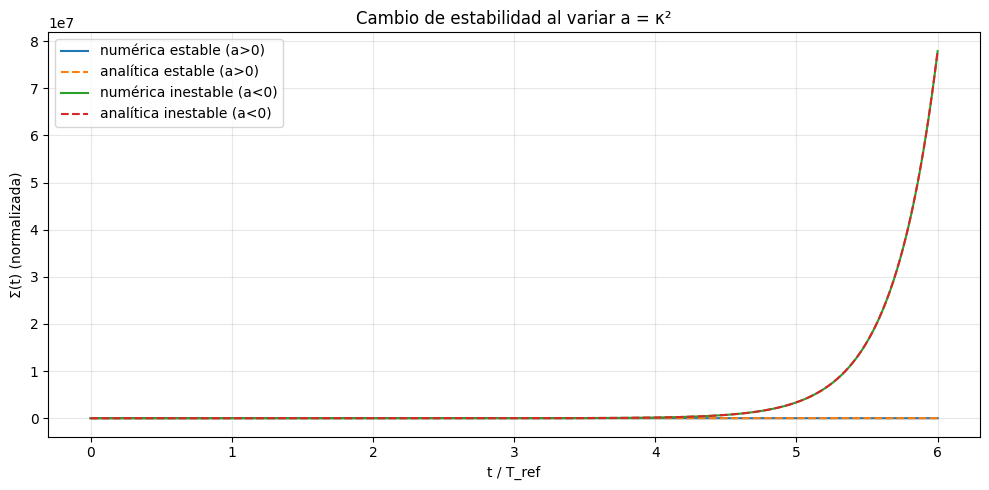

In [4]:
from scipy.integrate import solve_ivp


# 1) Parámetros físicos

V0 = 220.0          # velocidad plana (u. arbitrarias, p.e. km/s)
radios = [4.0, 8.0, 12.0]  # radios para mostrar distintos kappas (u. arbitrarias)

# Condiciones iniciales
Sigma0 = 1.0
dSigma0 = 0.3

# Tiempo (lo ponemos en múltiplos del período del caso intermedio)
Omega_ref = V0 / radios[1]
kappa_ref = np.sqrt(2.0) * Omega_ref
T_ref = 2.0 * np.pi / kappa_ref
t_ini, t_fin = 0.0, 6.0 * T_ref
t_eval = np.linspace(t_ini, t_fin, 2000)


# 2) Sistema 1ª orden y sol. analítica

#     d/dt [Sigma, vel]^T = A [Sigma, vel]^T,  con A = [[0, 1], [-a, 0]]
#     donde a = kappa^2 (puede ser >0 estable o <0 inestable)

def sistema(t, y, a):
    Sigma, vel = y
    return [vel, -a * Sigma]

def rk4_paso(fun, t, y, h, a):
    k1 = np.array(fun(t, y, a))
    k2 = np.array(fun(t + 0.5*h, y + 0.5*h*k1, a))
    k3 = np.array(fun(t + 0.5*h, y + 0.5*h*k2, a))
    k4 = np.array(fun(t + h, y + h*k3, a))
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def solucion_analitica(t, Sigma0, dSigma0, a):
    t = np.asarray(t)
    if a > 0:
        kappa = np.sqrt(a)
        return Sigma0*np.cos(kappa*t) + (dSigma0/kappa)*np.sin(kappa*t)
    else:
        # a < 0  -> crecimiento/decadencia exponencial (kappa = i*sigma)
        sigma = np.sqrt(-a)
        return Sigma0*np.cosh(sigma*t) + (dSigma0/sigma)*np.sinh(sigma*t)


# 3) Graficar Σ(t) y comparar numérico vs analítico para 3 radios

plt.figure(figsize=(11, 6))

for r in radios:
    Omega = V0 / r
    kappa = np.sqrt(2.0) * Omega
    a = kappa**2

    # solve_ivp (RK45)
    sol = solve_ivp(sistema, (t_ini, t_fin), [Sigma0, dSigma0], t_eval=t_eval, args=(a,))

    # RK4 manual (mismo mallado)
    y = np.array([Sigma0, dSigma0], dtype=float)
    Sigma_rk4 = np.empty_like(t_eval)
    Sigma_rk4[0] = y[0]
    for i in range(len(t_eval) - 1):
        h = t_eval[i+1] - t_eval[i]
        y = rk4_paso(sistema, t_eval[i], y, h, a)
        Sigma_rk4[i+1] = y[0]

    # Analítica
    Sigma_ana = solucion_analitica(t_eval, Sigma0, dSigma0, a)

    # Autovalores de A (teoría: ± i*sqrt(a) si a>0)
    A = np.array([[0.0, 1.0],
                  [-a, 0.0]])
    autovalores = np.linalg.eigvals(A)

    print(f"r = {r:.1f}: kappa = {kappa:.4f}, a = kappa^2 = {a:.4f}, autovalores(A) = {autovalores}")

    # Graficar
    plt.plot(t_eval/T_ref, Sigma_ana, '--', label=f'Analítica, r={r}')
    plt.plot(t_eval/T_ref, sol.y[0],  '-',  lw=1.2, label=f'solve_ivp, r={r}')
    plt.plot(t_eval/T_ref, Sigma_rk4, ':',  lw=1.2, label=f'RK4, r={r}')

plt.xlabel('t / T_ref')
plt.ylabel('Σ(t) (normalizada)')
plt.title('Evolución temporal de Σ(t): numérica vs analítica (disco estable, κ²>0)')
plt.legend(ncol=3, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()


# 4) Estabilidad: qué pasa si cambiamos el signo de a = κ²
#    (a<0 equivale a κ imaginario → inestable)

plt.figure(figsize=(10, 5))

a_estable = kappa_ref**2          # >0 (oscilatorio)
a_inestable = - (0.5*kappa_ref)**2  # <0 (crecimiento exponencial)

for a, etiqueta in [(a_estable, 'estable (a>0)'), (a_inestable, 'inestable (a<0)')]:
    sol = solve_ivp(sistema, (t_ini, t_fin), [Sigma0, dSigma0], t_eval=t_eval, args=(a,))
    Sigma_ana = solucion_analitica(t_eval, Sigma0, dSigma0, a)

    A = np.array([[0.0, 1.0],
                  [-a, 0.0]])
    autovalores = np.linalg.eigvals(A)
    print(f"[{etiqueta}] a = {a:.4f}, autovalores(A) = {autovalores}")

    plt.plot(t_eval/T_ref, sol.y[0], '-', label=f'numérica {etiqueta}')
    plt.plot(t_eval/T_ref, Sigma_ana, '--', label=f'analítica {etiqueta}')

plt.xlabel('t / T_ref')
plt.ylabel('Σ(t) (normalizada)')
plt.title('Cambio de estabilidad al variar a = κ²')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

9.

El método Leapfrog (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:

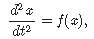

la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
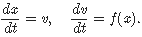

El método Leapfrog actualiza las variables en pasos intercalados de tiempo (Δt) mediante las siguientes fórmulas:

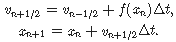

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde f(x)=−ω2x con ω=2 rad/s. Use condiciones iniciales x(0)=1 y v(0)=0, y un paso de tiempo Δt=0.01s en el intervalo t∈[0,10]s.

Nota: La siguiente relación puede ser útil:
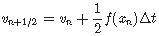

Paso dt = 0.01
Error máximo en posición |x_num - x_ex|: 1.950e+00
Error máximo en velocidad |v_num - v_ex|: 3.412e+00
Desviación máxima de energía (E - E0): 1.000e+00


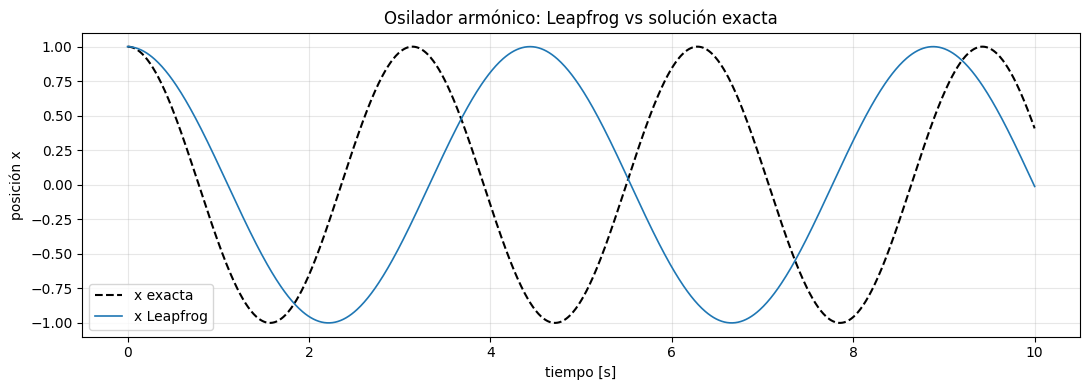

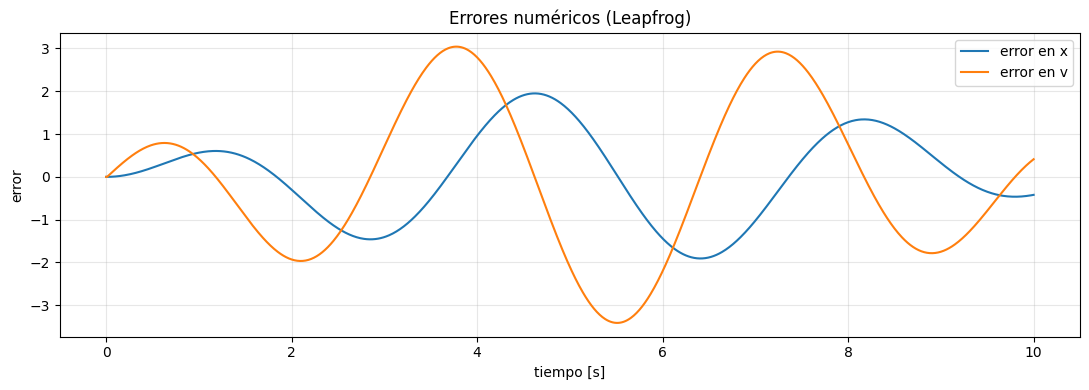

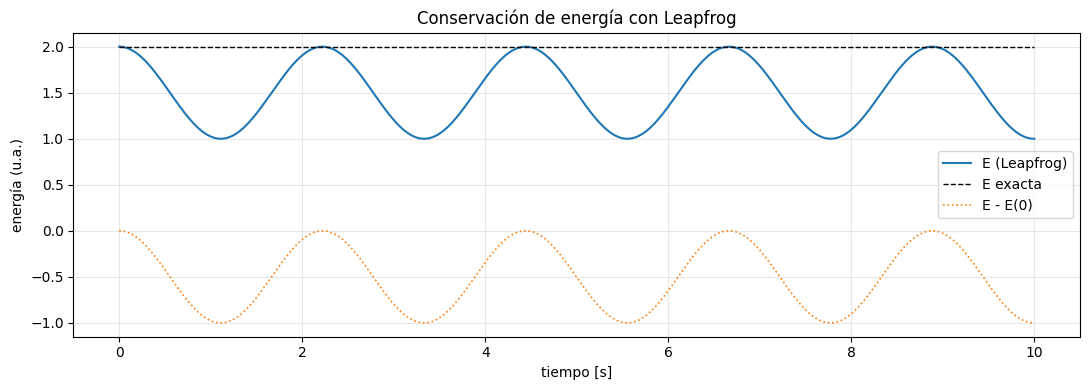

In [5]:
# ----- Parámetros del problema -----
omega = 2.0                   # rad/s
fuerza = lambda x: -(omega**2)*x

x0 = 1.0                      # x(0)
v0 = 0.0                      # v(0)
dt = 0.01                     # paso de tiempo
t_ini, t_fin = 0.0, 10.0
tiempo = np.arange(t_ini, t_fin + dt, dt)
N = len(tiempo)

# ----- Arreglos para almacenar la solución numérica (Leapfrog) -----
x = np.zeros(N)
v = np.zeros(N)

x[0] = x0
v[0] = v0

# Paso medio inicial (opcionalmente se puede usar la relación sugerida)
# v_{1/2} = v0 + 0.5*f(x0)*dt
v_med = v0 + 0.5 * fuerza(x0) * dt

# ----- Integración Leapfrog -----
for n in range(N - 1):
    # posición en el paso siguiente
    x[n+1] = x[n] + v_med * dt
    # actualizar velocidad a paso completo usando la aceleración en x_{n+1}
    v_med = v_med + 0.5 * fuerza(x[n+1]) * dt
    v[n+1] = v_med  # guardar v_{n+1} (después de la segunda media-actualización)

# ----- Solución exacta para comparación -----
x_exacto = np.cos(omega * tiempo)
v_exacto = -omega * np.sin(omega * tiempo)

# ----- Energía mecánica (debería conservarse aproximadamente) -----
energia = 0.5*(v**2 + (omega**2)*(x**2))
energia_exacta = 0.5*(v_exacto**2 + (omega**2)*(x_exacto**2))

# ----- Errores -----
error_x = x - x_exacto
error_v = v - v_exacto
error_max_x = np.max(np.abs(error_x))
error_max_v = np.max(np.abs(error_v))
deriva_energia = energia - energia[0]

print(f"Paso dt = {dt}")
print(f"Error máximo en posición |x_num - x_ex|: {error_max_x:.3e}")
print(f"Error máximo en velocidad |v_num - v_ex|: {error_max_v:.3e}")
print(f"Desviación máxima de energía (E - E0): {np.max(np.abs(deriva_energia)):.3e}")

# ----- Gráficas -----
plt.figure(figsize=(11,4))
plt.plot(tiempo, x_exacto, 'k--', lw=1.5, label='x exacta')
plt.plot(tiempo, x, lw=1.2, label='x Leapfrog')
plt.xlabel('tiempo [s]')
plt.ylabel('posición x')
plt.title('Osilador armónico: Leapfrog vs solución exacta')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.figure(figsize=(11,4))
plt.plot(tiempo, error_x, label='error en x')
plt.plot(tiempo, error_v, label='error en v')
plt.xlabel('tiempo [s]')
plt.ylabel('error')
plt.title('Errores numéricos (Leapfrog)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.figure(figsize=(11,4))
plt.plot(tiempo, energia, label='E (Leapfrog)')
plt.plot(tiempo, energia_exacta, 'k--', lw=1.0, label='E exacta')
plt.plot(tiempo, deriva_energia, ':', lw=1.2, label='E - E(0)')
plt.xlabel('tiempo [s]')
plt.ylabel('energía (u.a.)')
plt.title('Conservación de energía con Leapfrog')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()